In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/My Drive/UROP_Lee/"
%ls
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import itertools

Mounted at /content/drive
/content/drive/My Drive/UROP_Lee
 11_3_15_06.csv      Machine_training.ipynb         Test2.csv       Testing4.csv
 11_3_15_06_pw.csv   Measured.csv                   Test3.csv       Train.csv
 11_3_15_17.csv     'New data'/                     Test4.csv       Train_data.csv
 11_3_15_17_pw.csv   Power_machine_learning.ipynb   Test_data.csv   Train_feature.txt
 3_11_15_07.csv      Predicted_value.csv            Testing1.csv
 3_12_15_06.csv      Target_value.csv               Testing2.csv
 best_model.h5       Test1.csv                      Testing3.csv


In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn import metrics

In [3]:
M1 = pd.read_csv("New data/M1.CSV",encoding='ISO-8859-1')
M1_pw = pd.read_csv("New data/M1_pw.csv")
M2 = pd.read_csv("New data/M2.csv")
M2_pw = pd.read_csv("New data/M2_pw.csv")
M3 = pd.read_csv("New data/M3.CSV",encoding='ISO-8859-1')
M3_pw = pd.read_csv("New data/M3_pw.csv")
M4 = pd.read_csv("New data/M4.CSV",encoding='ISO-8859-1')
M4_pw = pd.read_csv("New data/M4_pw.csv")
M5 = pd.read_csv("New data/M5.CSV",encoding='ISO-8859-1')
M5_pw = pd.read_csv("New data/M5_pw.csv")
M6 = pd.read_csv("New data/M6.CSV",encoding='ISO-8859-1')
M6_pw = pd.read_csv("New data/M6_pw.csv")
M6 = pd.read_csv("New data/M6.CSV",encoding='ISO-8859-1')
M6_pw = pd.read_csv("New data/M6_pw.csv")
M7 = pd.read_csv("New data/M7.CSV",encoding='ISO-8859-1')
M7_pw = pd.read_csv("New data/M7_pw.csv")

T1 = pd.read_csv("New data/T1.csv",encoding='ISO-8859-1')
T1_pw = pd.read_csv("New data/T1_pw.csv")
T2 = pd.read_csv("New data/T2.csv",encoding='ISO-8859-1')
T2_pw = pd.read_csv("New data/T2_pw.csv")
T3 = pd.read_csv("11_3_15_17.csv",encoding='ISO-8859-1')
T3_pw = pd.read_csv("11_3_15_17_pw.csv")
T4 = pd.read_csv("11_3_15_06.csv",encoding='ISO-8859-1')
T4_pw = pd.read_csv("11_3_15_06_pw.csv")
T5 = pd.read_csv("New data/T3.CSV",encoding='ISO-8859-1')
T5_pw = pd.read_csv("New data/T3_pw.csv")

In [4]:
T6 = pd.read_csv("New data/T4.CSV",encoding='ISO-8859-1')
T6_pw = pd.read_csv("New data/T4_pw.csv")
T7 = pd.read_csv("New data/T5.CSV",encoding='ISO-8859-1')
T7_pw = pd.read_csv("New data/T5_pw.csv")
T8 = pd.read_csv("New data/T6.CSV",encoding='ISO-8859-1')
T8_pw = pd.read_csv("New data/T6_pw.csv")
T9 = pd.read_csv("New data/T7.CSV",encoding='ISO-8859-1')
T9_pw = pd.read_csv("New data/T7_pw.csv")

In [33]:
M_list = [M1,M2,M3,M4,M5,M6,M7]
P_list = [M1_pw,M2_pw,M3_pw,M4_pw,M5_pw,M6_pw,M7_pw]
T_list = [T1,T2,T3,T4,T5,T6,T7,T8,T9]
TP_list = [T1_pw,T2_pw,T3_pw,T4_pw,T5_pw,T6_pw,T7_pw,T8_pw,T9_pw]

In [6]:
def custom_time_parser(s):
    # Filter out non-string type (due to NaNs in the data) and 'Time'
    if type(s) is not str or s == 'Time':
        return None

    # Split into time and the PM/AM
    time, modifier = s.split()
    # Split time into hours, minutes and seconds+milliseconds,
    hours, minutes, seconds = map(int, time.split(':'))
    # Split seconds into seconds and milliseconds
    term, milliseconds = modifier.split(':')
    milliseconds = int(milliseconds)
    # If it's PM, add 12 to the hour (but not if it's 12 PM)
    if modifier.upper() == 'PM' and hours != 12:
        hours += 12
    elif modifier.upper() == 'AM' and hours == 12:
        hours = 0
    return pd.Timestamp(2024,1,1,hours, minutes, seconds)

In [7]:
def custom_parser(s):
    # check if s is a float (possibly NaN)
    if isinstance(s, float):
        # if it is, return a pandas Not a Time (NaT) value
        return pd.NaT
    else:
        # check if s is 'Time'
        if s == 'Time':
            return pd.NaT
        else:
            # split timestamp into hours, minutes and seconds
            parts = s.split(":")
            # split the second into whole seconds and fractional seconds and then pad 0
            sec_parts = parts[2].split(".")
            hours = int(parts[0])
            minutes = int(parts[1])
            seconds = int(sec_parts[0])
            if hours > 12:
              hours -= 12
            elif hours == 0:
              hours = 12
            # convert the formatted time to datetime
            return pd.Timestamp(2024, 1, 1, hours, minutes, seconds)

In [8]:
def Average_for_one_second(d1, d1_t):
    d1_t = d1_t.rename(columns={'??(V)': 'voltage', '??(A)': 'ampere','??(W)':'watt','??.1':'Time','????':'factor'})
    ori = d1
    d1 = d1.iloc[:-2]
    d1_t['Time'] = d1_t['Time'].apply(custom_time_parser)
    d1['Time'] = d1['Time'].apply(custom_parser)

    cat = []
    # Iterating over each column
    for column in d1.columns:
      # Try to convert column to float type
      if column == 'Time':
        continue
      d1[column] = pd.to_numeric(d1[column], errors='ignore')

    # for column in d1.columns:
    #   if d1[column].dtype != object:
    #     cat.append(column)

    # Re = d1[cat]
    d1 = d1.drop('Date', axis=1)
    d1 = d1.replace({'Yes': 1, 'No': 0})
    d1 = d1.groupby('Time').mean()
    d1_t = d1_t.groupby('Time').mean()
    result = d1.merge(d1_t['watt'], on='Time', how='inner')
    return result


ProcessedT1 = Average_for_one_second(T1, T1_pw)
ProcessedT2 = Average_for_one_second(T2, T2_pw)
ProcessedT3 = Average_for_one_second(T3, T3_pw)
ProcessedT4 = Average_for_one_second(T4, T4_pw)
ProcessedT5 = Average_for_one_second(T5, T5_pw)
ProcessedT6 = Average_for_one_second(T6, T6_pw)
ProcessedT7 = Average_for_one_second(T7, T7_pw)
ProcessedT8 = Average_for_one_second(T8, T8_pw)
ProcessedT9 = Average_for_one_second(T9, T9_pw)

<ipython-input-8-bbfb404db979>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Time'] = d1['Time'].apply(custom_parser)
<ipython-input-8-bbfb404db979>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[column] = pd.to_numeric(d1[column], errors='ignore')
<ipython-input-8-bbfb404db979>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [9]:
ProcessedM1 = Average_for_one_second(M1, M1_pw)
ProcessedM2 = Average_for_one_second(M2, M2_pw)
ProcessedM3 = Average_for_one_second(M3, M3_pw)
ProcessedM4 = Average_for_one_second(M4, M4_pw)
ProcessedM5 = Average_for_one_second(M5, M5_pw)
ProcessedM6 = Average_for_one_second(M6, M6_pw)
ProcessedM7 = Average_for_one_second(M7, M7_pw)

<ipython-input-8-bbfb404db979>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Time'] = d1['Time'].apply(custom_parser)
<ipython-input-8-bbfb404db979>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[column] = pd.to_numeric(d1[column], errors='ignore')
<ipython-input-8-bbfb404db979>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

(609, 232)
(278, 232)
(371, 232)
(459, 232)
(299, 232)
(231, 232)
(425, 232)
(412, 229)
(386, 229)
(922, 231)
(631, 231)


In [10]:
ProcessedM1['Source'] = 'ProcessedM1'
ProcessedM2['Source'] = 'ProcessedM2'
ProcessedM3['Source'] = 'ProcessedM3'
ProcessedM4['Source'] = 'ProcessedM4'
ProcessedM5['Source'] = 'ProcessedM5'
ProcessedM6['Source'] = 'ProcessedM6'
ProcessedM7['Source'] = 'ProcessedM7'

frames = [ProcessedM1, ProcessedM2, ProcessedM3, ProcessedM4, ProcessedM5, ProcessedM6, ProcessedM7, ProcessedT1, ProcessedT2, ProcessedT3, ProcessedT4]

df_big = pd.concat(frames, ignore_index=True)
print(df_big.shape)

(5023, 254)


In [11]:
def smooth(data, window_size):
    return [sum(data[i-window_size+1:i+1])/window_size for i in range(window_size-1, len(data))]

def comparison_(df, feature1, feature2):
    plt.figure(figsize=(10,5))

    # Plot Feature 1
    plt.plot(smooth(df[feature1],21), label=feature1)

    # Plot Feature 2
    plt.plot(smooth(df[feature2],21), label=feature2)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{feature1} and {feature2} Over Time')
    plt.legend()

    plt.show()

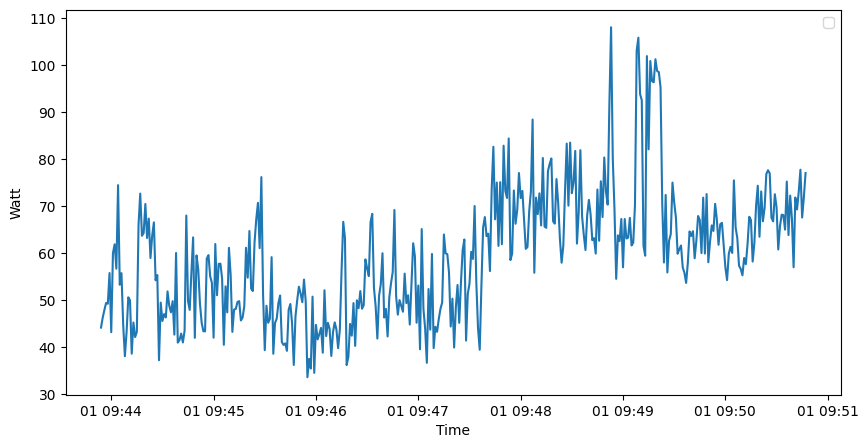

In [34]:
plt.figure(figsize=(10,5))

    # Plot Feature 1
plt.plot(ProcessedT1['watt'])


plt.xlabel('Time')
plt.ylabel('Watt')
plt.legend()

plt.show()

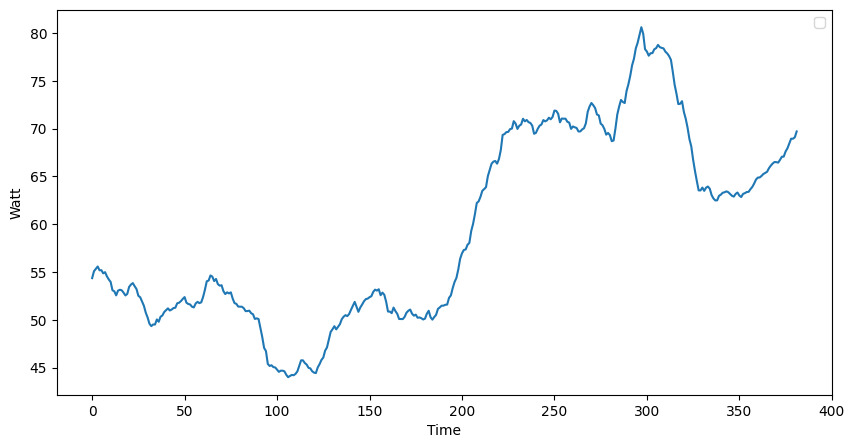

In [35]:
plt.figure(figsize=(10,5))

    # Plot Feature 1
plt.plot(smooth(ProcessedT1['watt'],31))


plt.xlabel('Time')
plt.ylabel('Watt')
plt.legend()

plt.show()

In [12]:
ProcessedT1.columns = ProcessedT1.columns.str.replace('Â', '')
ProcessedT2.columns = ProcessedT2.columns.str.replace('Â', '')
ProcessedT3.columns = ProcessedT3.columns.str.replace('Â', '')
ProcessedT4.columns = ProcessedT4.columns.str.replace('Â', '')
ProcessedT5.columns = ProcessedT5.columns.str.replace('Â', '')
ProcessedT6.columns = ProcessedT6.columns.str.replace('Â', '')
ProcessedT7.columns = ProcessedT7.columns.str.replace('Â', '')
ProcessedT8.columns = ProcessedT8.columns.str.replace('Â', '')
ProcessedT9.columns = ProcessedT9.columns.str.replace('Â', '')

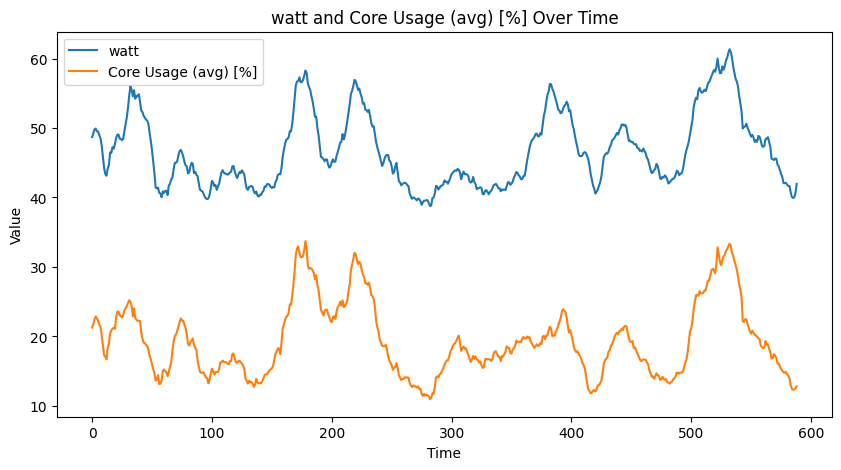

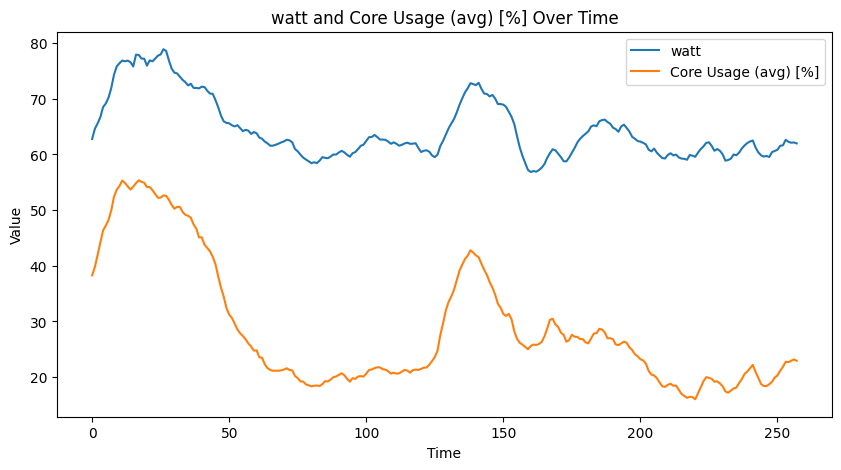

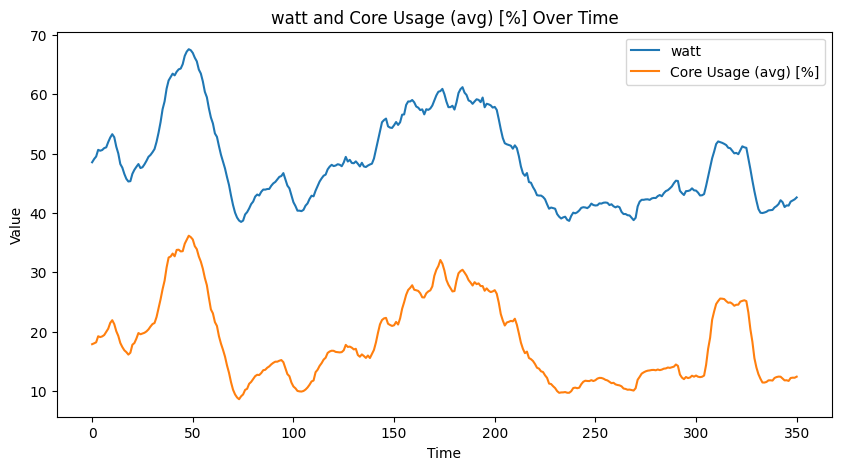

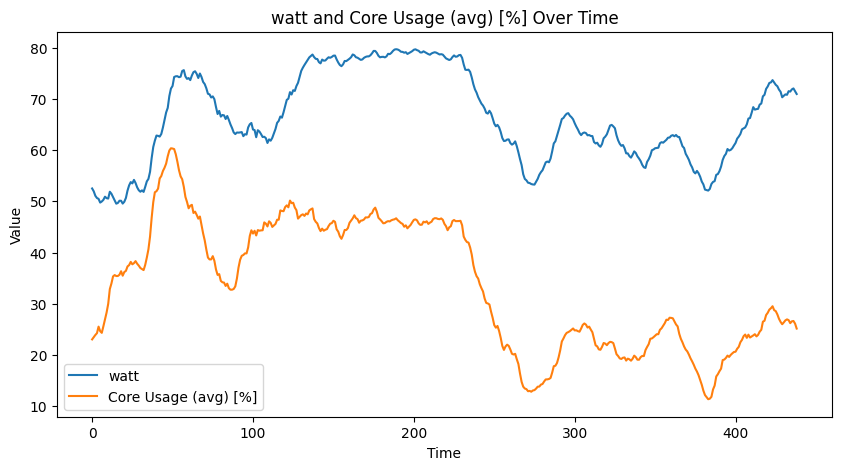

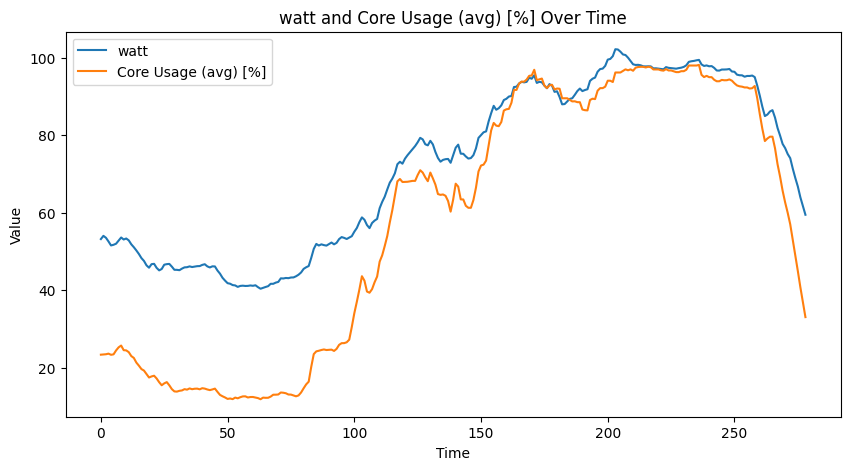

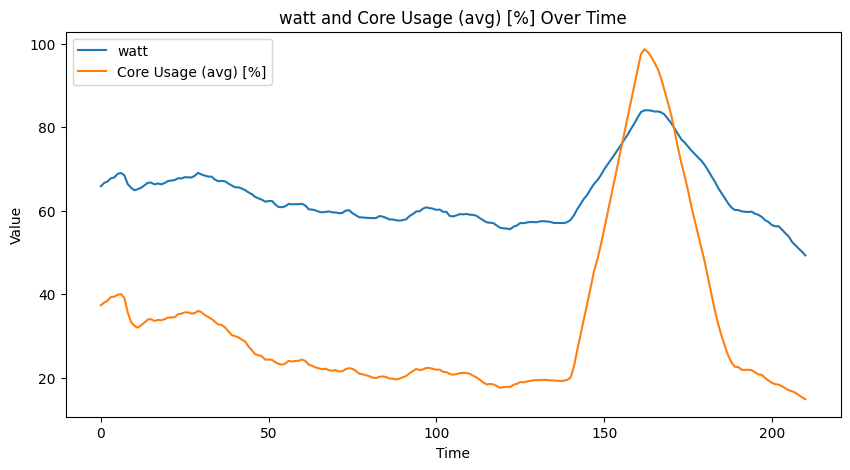

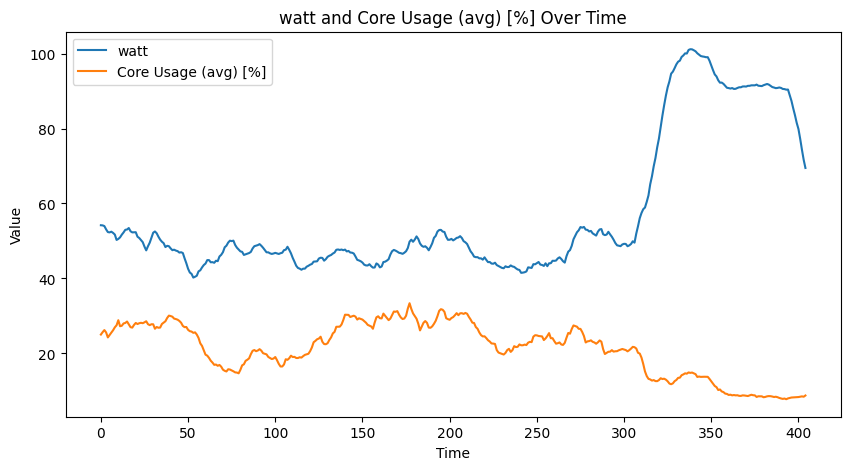

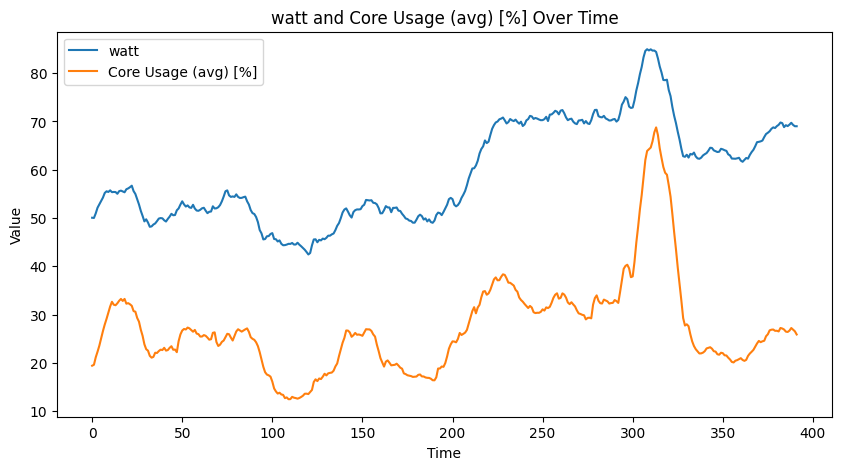

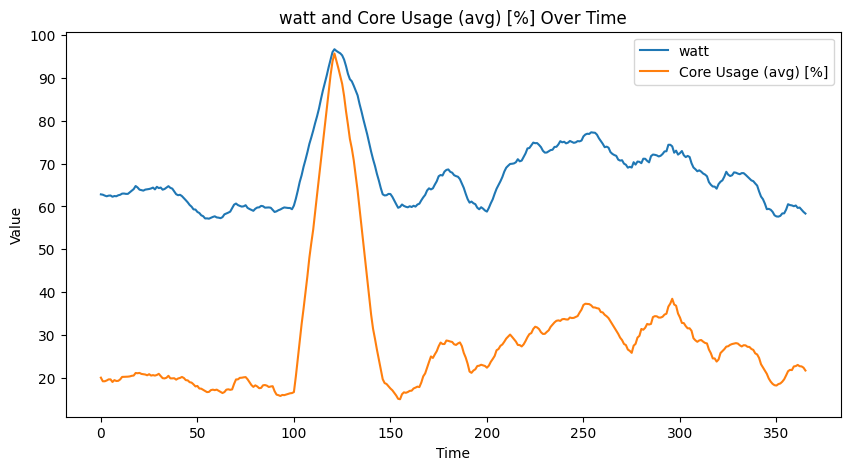

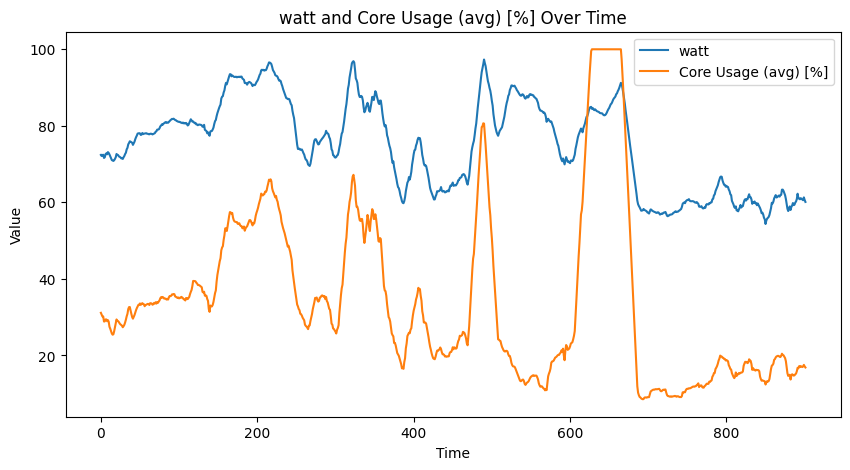

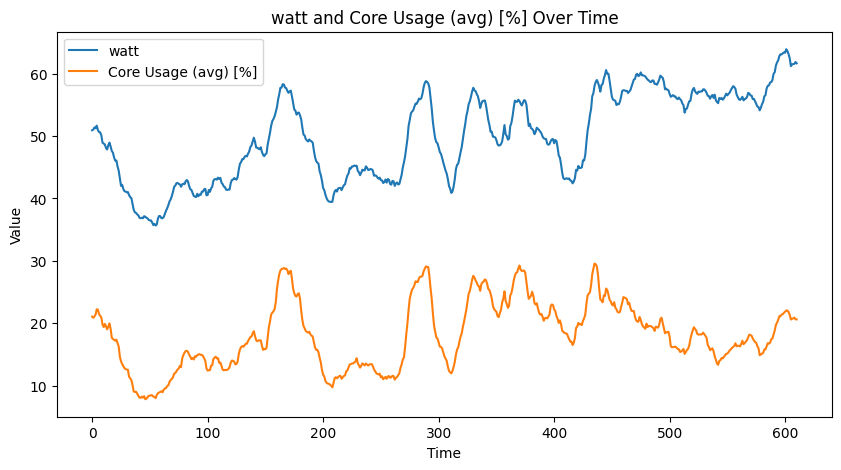

In [13]:
comparison_(ProcessedM1, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedM2, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedM3, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedM4, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedM5, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedM6, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedM7, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedT1, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedT2, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedT3, 'watt', 'Core Usage (avg) [%]')
comparison_(ProcessedT4, 'watt', 'Core Usage (avg) [%]')

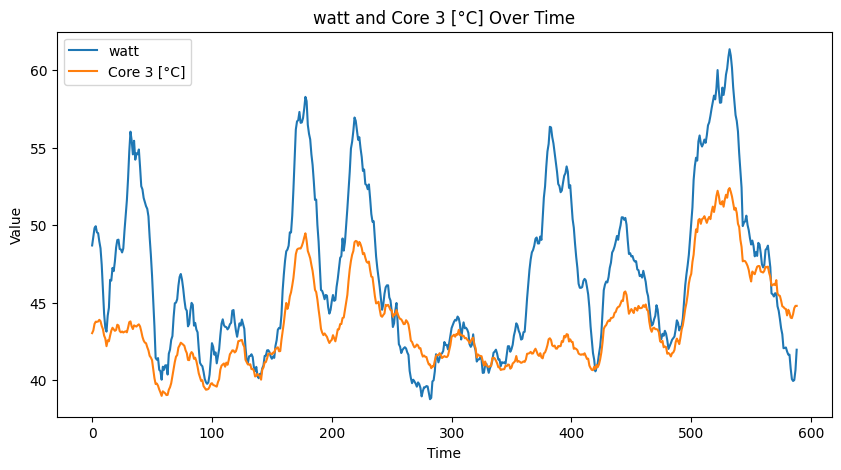

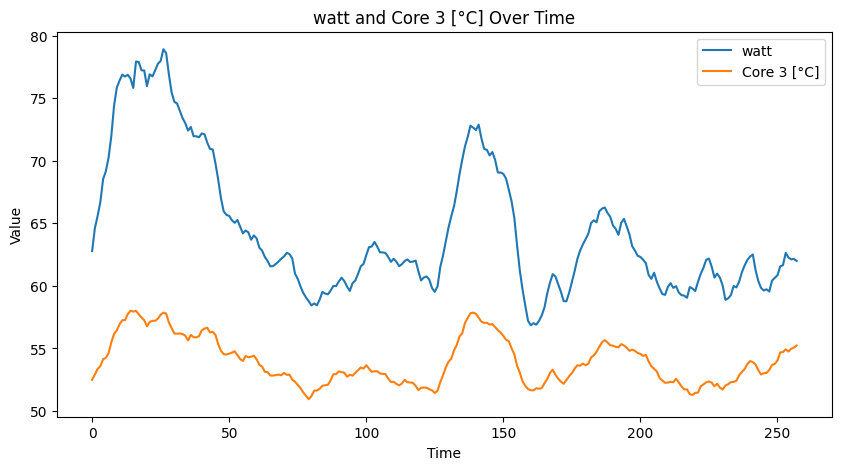

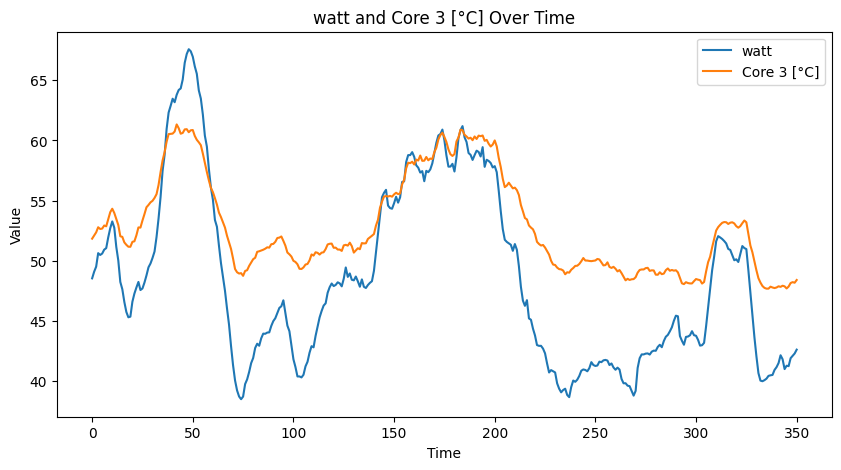

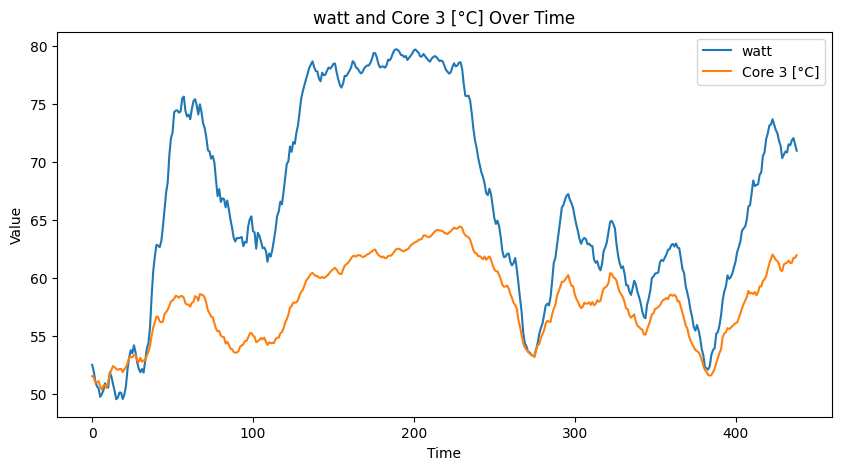

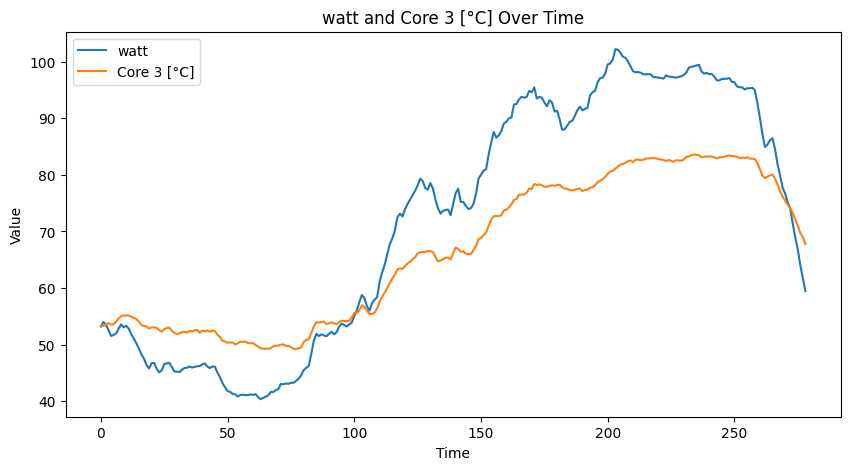

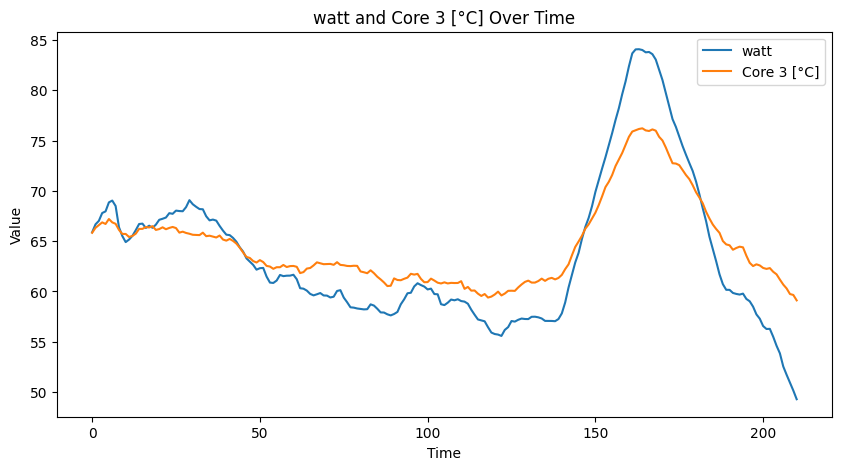

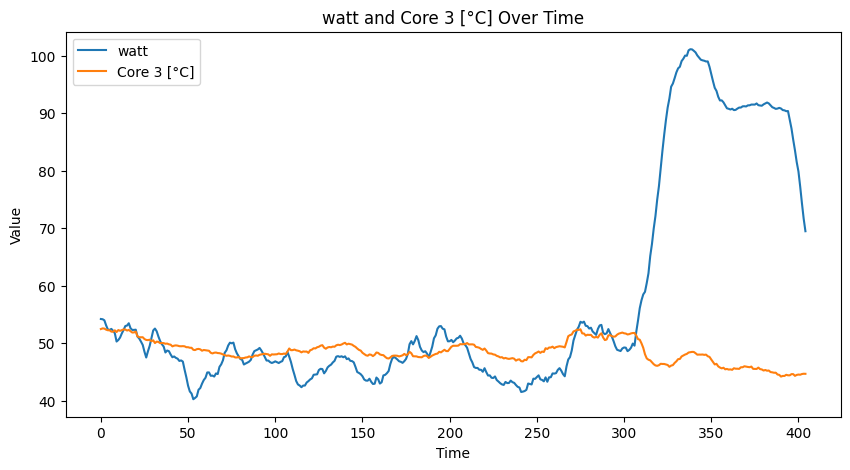

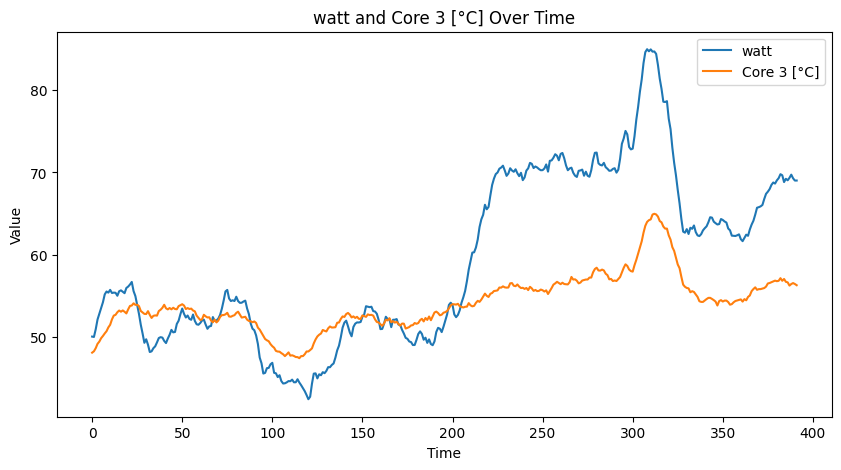

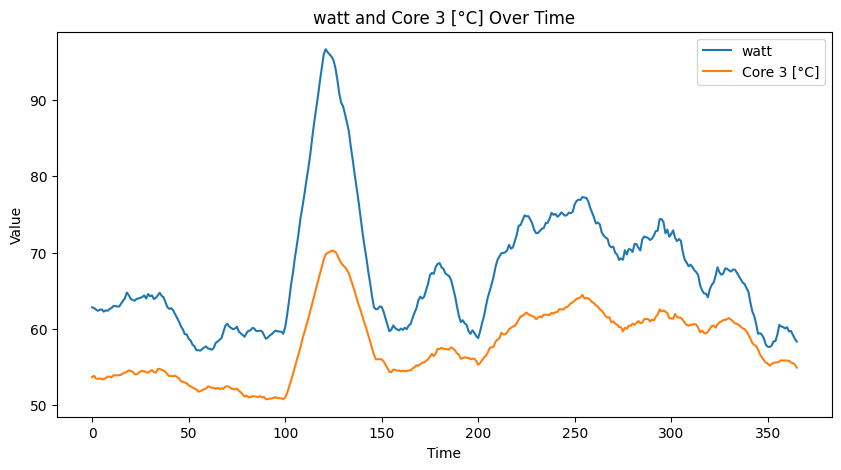

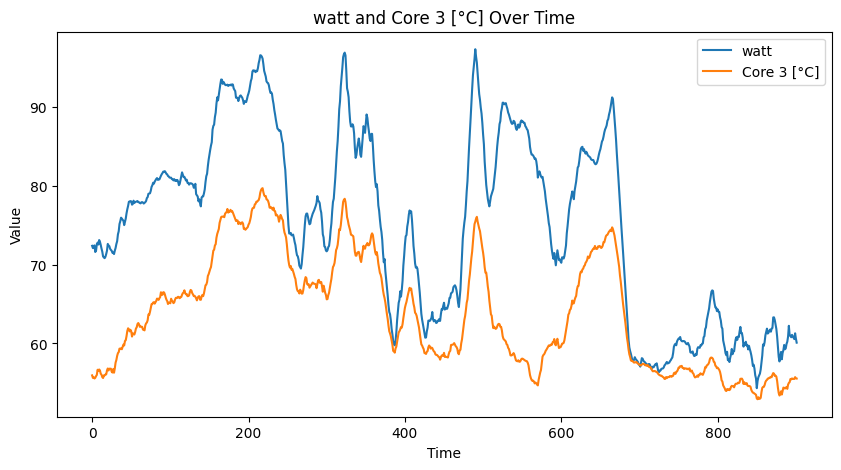

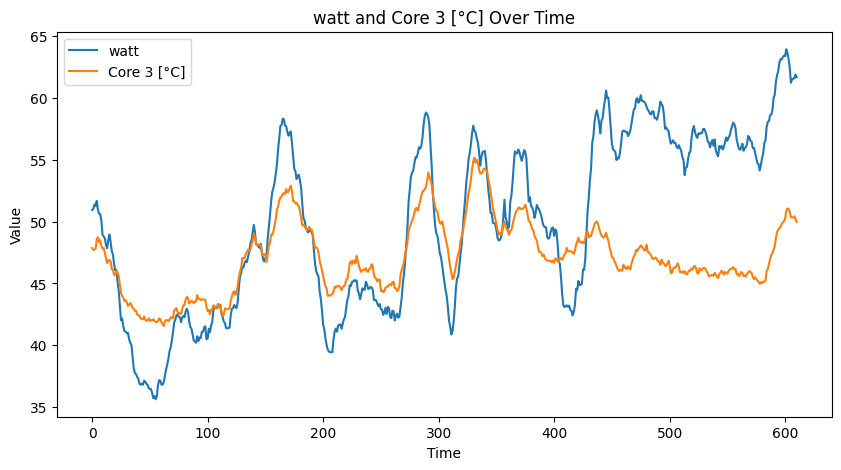

In [14]:
comparison_(ProcessedM1, 'watt', 'Core 3 [°C]')
comparison_(ProcessedM2, 'watt', 'Core 3 [°C]')
comparison_(ProcessedM3, 'watt', 'Core 3 [°C]')
comparison_(ProcessedM4, 'watt', 'Core 3 [°C]')
comparison_(ProcessedM5, 'watt', 'Core 3 [°C]')
comparison_(ProcessedM6, 'watt', 'Core 3 [°C]')
comparison_(ProcessedM7, 'watt', 'Core 3 [°C]')
comparison_(ProcessedT1, 'watt', 'Core 3 [°C]')
comparison_(ProcessedT2, 'watt', 'Core 3 [°C]')
comparison_(ProcessedT3, 'watt', 'Core 3 [°C]')
comparison_(ProcessedT4, 'watt', 'Core 3 [°C]')

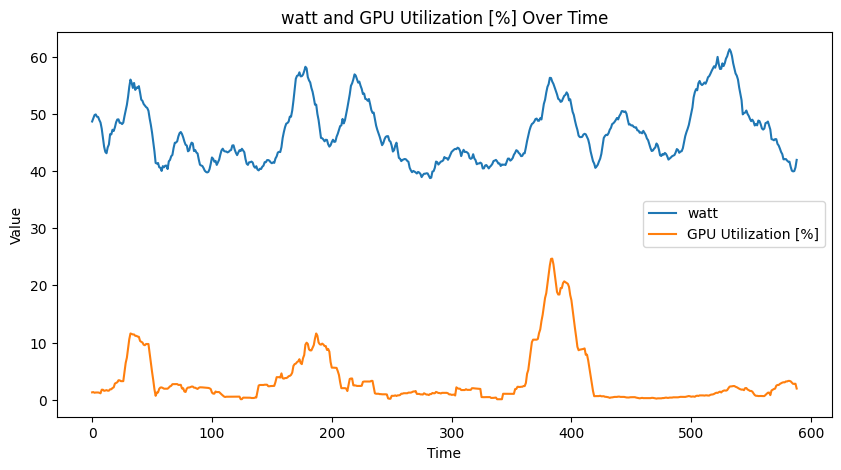

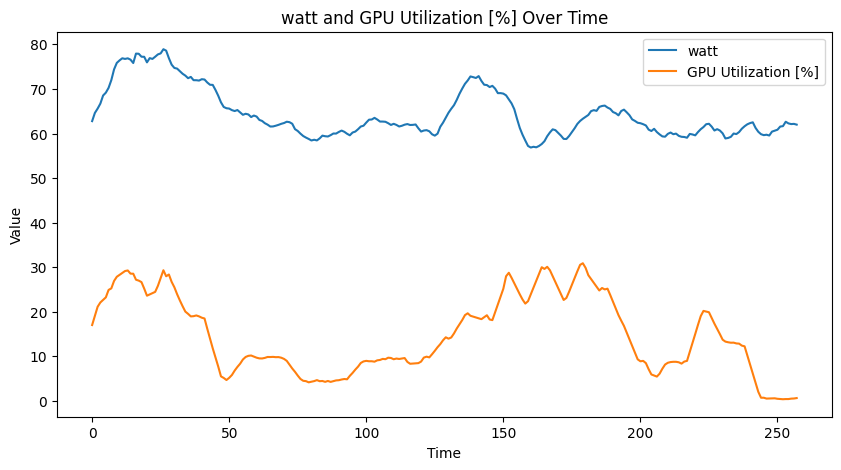

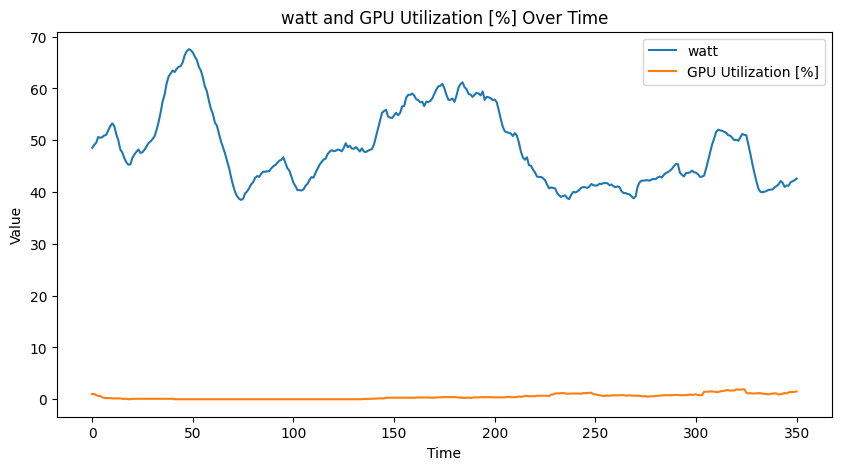

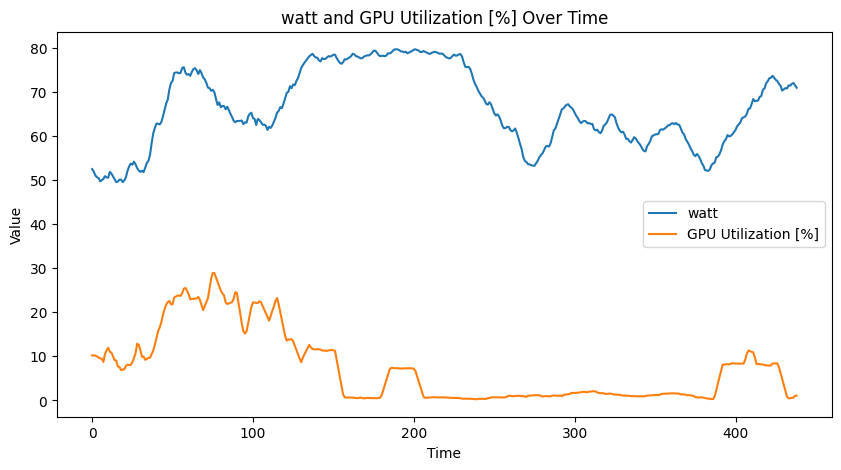

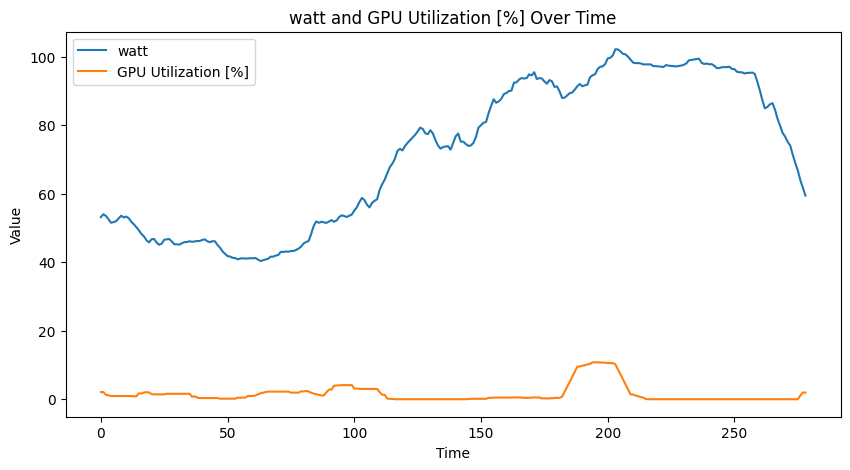

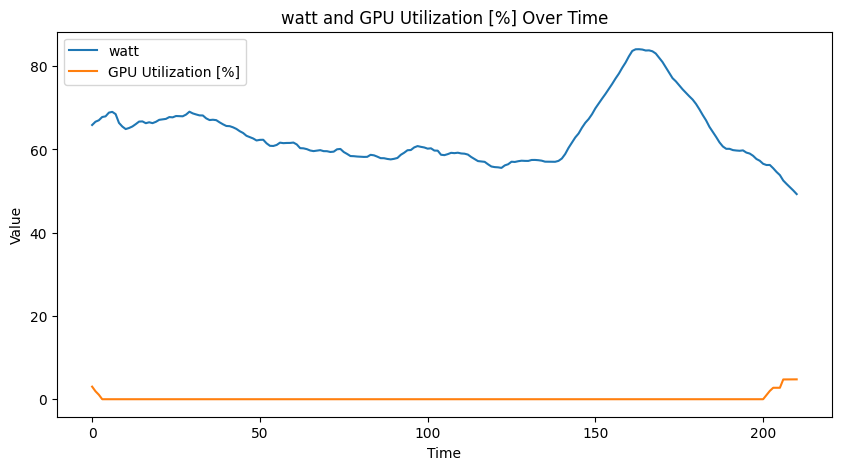

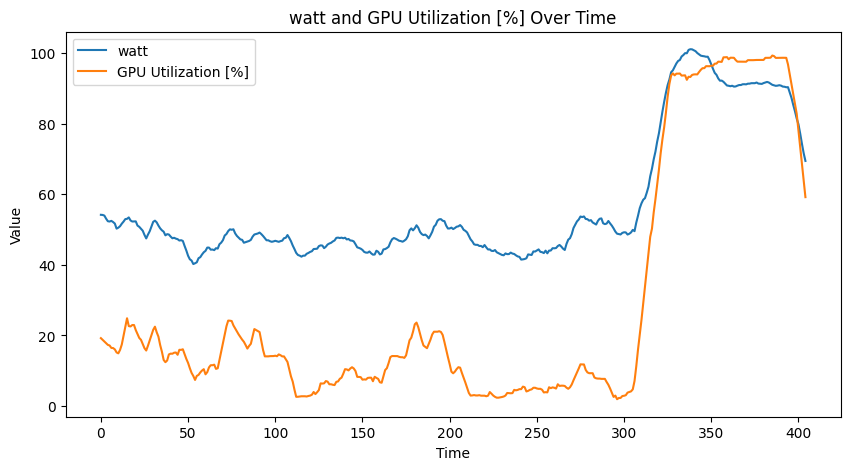

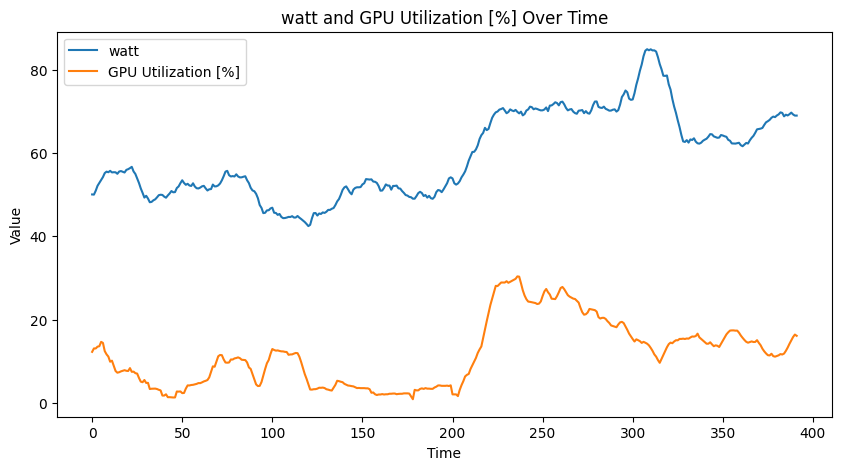

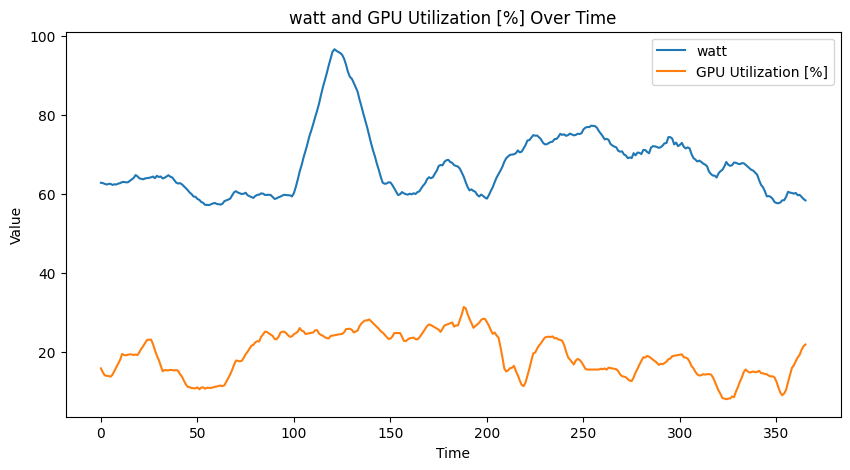

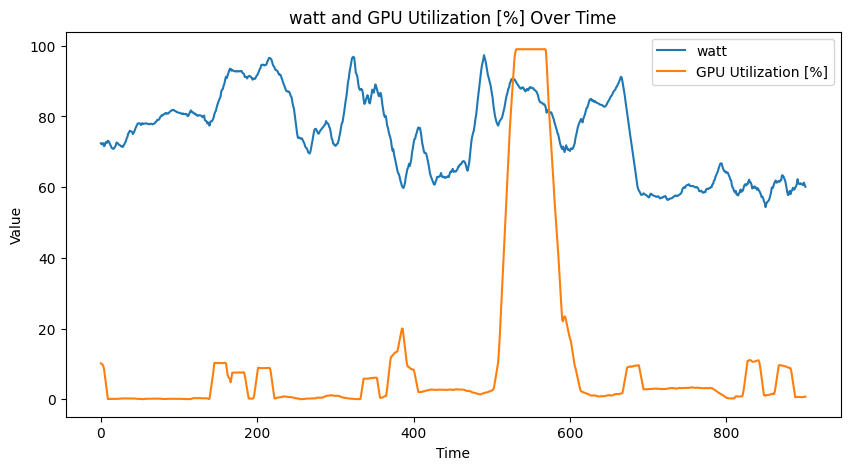

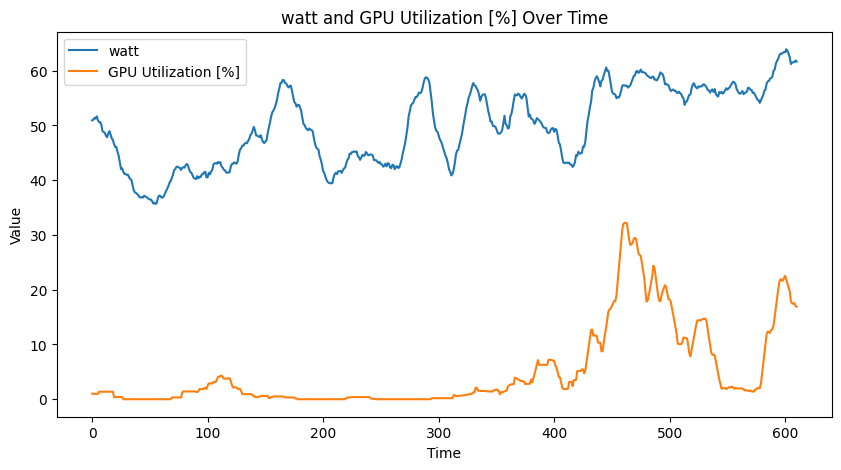

In [15]:
comparison_(ProcessedM1, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedM2, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedM3, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedM4, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedM5, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedM6, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedM7, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedT1, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedT2, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedT3, 'watt', 'GPU Utilization [%]')
comparison_(ProcessedT4, 'watt', 'GPU Utilization [%]')

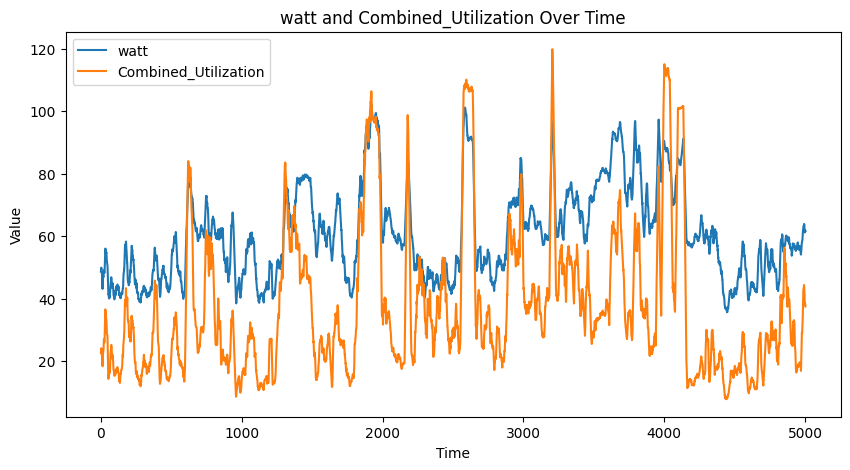

In [16]:
df_big['Combined_Utilization'] = df_big['GPU Utilization [%]'] + df_big['Core Usage (avg) [%]']
comparison_(df_big, 'watt', 'Combined_Utilization')

In [17]:
Train_feature_list = []
for feature in df_big.columns:
  if df_big[feature].nunique()>100:
    Train_feature_list.append(feature)
print(len(Train_feature_list))

136


Index(['Virtual Memory Committed [MB]', 'Virtual Memory Available [MB]',
       'Virtual Memory Load [%]', 'Physical Memory Used [MB]',
       'Physical Memory Available [MB]', 'Physical Memory Load [%]',
       'Page File Usage [%]', 'Core VIDs (avg) [V]', 'Core 0 VID [V]',
       'Core 1 VID [V]',
       ...
       'Core Max [Â°C]', 'CPU Package [Â°C].1', 'CPU IA Cores [Â°C]',
       'CPU GT Cores (Graphics) [Â°C]', 'VR VCC Temperature (SVID) [Â°C]',
       'PCH Temperature [Â°C]', 'Ambient [Â°C]', 'CPU [Â°C]',
       'Drive Temperature [Â°C]', 'GPU Thermal Diode [Â°C]'],
      dtype='object', length=254)

## Following for tSNE


In [18]:
# prompt: Create a tsne algorithm for the df_big dataframe, output a trained dataset
def tsne_process_model(df):
  New_df = pd.DataFrame({})
  df = df.reset_index(drop=True)

  for feature in df.columns:
      # Check if the feature name contains "[°C]"
      if '[°C]' in feature:
          # Subtract 'Ambient [°C]' feature value from the selected feature
          df[feature] = (df[feature]+273)/(df['Ambient [°C]']+273)
          print(feature,'_updated')
      if df[feature].dtype == object:
          continue
      New_df[feature] = df[feature]

  New_df['target_feature'] = df['watt']

# Fill NaN values with the mean of the respective column
  New_df = New_df.fillna(New_df.ffill().bfill())
  return New_df

df_train = tsne_process_model(df_big)

Core Temperatures (avg) [°C] _updated
Core 0 [°C] _updated
Core 1 [°C] _updated
Core 2 [°C] _updated
Core 3 [°C] _updated
Core Distance to TjMAX (avg) [°C] _updated
Core 0 Distance to TjMAX [°C] _updated
Core 1 Distance to TjMAX [°C] _updated
Core 2 Distance to TjMAX [°C] _updated
Core 3 Distance to TjMAX [°C] _updated
CPU Package [°C] _updated
Core Max [°C] _updated
CPU Package [°C].1 _updated
CPU IA Cores [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
VR VCC Temperature (SVID) [°C] _updated
PCH Temperature [°C] _updated
Ambient [°C] _updated
CPU [°C] _updated
Drive Temperature [°C] _updated
GPU Thermal Diode [°C] _updated


<ipython-input-18-e04f587d6bd7>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  New_df[feature] = df[feature]
<ipython-input-18-e04f587d6bd7>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  New_df[feature] = df[feature]
<ipython-input-18-e04f587d6bd7>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

In [19]:
# Print the number of NaNs in each feature
for feature in df_train.columns:
    print(feature, df_train[feature].isnull().sum())

# Drop features that contain any NaN values
df_train_cleaned = df_train.dropna(axis=1)

# Optionally, if you want to print the columns that were dropped due to NaN values
dropped_features = set(df_train.columns) - set(df_train_cleaned.columns)
print("Dropped features due to NaN values:", dropped_features)

Virtual Memory Committed [MB] 0
Virtual Memory Available [MB] 0
Virtual Memory Load [%] 0
Physical Memory Used [MB] 0
Physical Memory Available [MB] 0
Physical Memory Load [%] 0
Page File Usage [%] 0
Core VIDs (avg) [V] 0
Core 0 VID [V] 0
Core 1 VID [V] 0
Core 2 VID [V] 0
Core 3 VID [V] 0
Core Clocks (avg) [MHz] 0
Core 0 Clock [MHz] 0
Core 1 Clock [MHz] 0
Core 2 Clock [MHz] 0
Core 3 Clock [MHz] 0
Bus Clock [MHz] 0
Ring/LLC Clock [MHz] 0
System Agent Clock [MHz] 0
Core Effective Clocks (avg) [MHz] 0
Core 0 T0 Effective Clock [MHz] 0
Core 0 T1 Effective Clock [MHz] 0
Core 1 T0 Effective Clock [MHz] 0
Core 1 T1 Effective Clock [MHz] 0
Core 2 T0 Effective Clock [MHz] 0
Core 2 T1 Effective Clock [MHz] 0
Core 3 T0 Effective Clock [MHz] 0
Core 3 T1 Effective Clock [MHz] 0
Average Effective Clock [MHz] 0
Core Usage (avg) [%] 0
Core 0 T0 Usage [%] 0
Core 0 T1 Usage [%] 0
Core 1 T0 Usage [%] 0
Core 1 T1 Usage [%] 0
Core 2 T0 Usage [%] 0
Core 2 T1 Usage [%] 0
Core 3 T0 Usage [%] 0
Core 3 T1 Usage

In [31]:
from sklearn.manifold import TSNE

def tsne_visualization(df, n = 5):
    X = df.drop('target_feature', axis=1)
    y = df['target_feature']

    # Initialize t-SNE with the n_components parameter set dynamically
    tsne = TSNE(n_components=n, random_state=0)

    # Apply t-SNE to the feature matrix and return the results
    tsne_results = tsne.fit_transform(X)
    return tsne_results

# Run the function with a cleaned DataFrame
tsne_train = tsne_visualization(df_train_cleaned, n=3)

In [36]:
tsne_train = pd.DataFrame(tsne_train, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
X = tsne_train
labels = df_train_cleaned['target_feature']

tsne_train_df = pd.concat([tsne_train,labels])
# Splitting the data into training and testing set
features_train, features_test, labels_train, labels_test = train_test_split(X, labels, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(features_train, labels_train)

# Making predictions on the testing set
predictions = model.predict(features_test)

# To see the values of the coefficients created by the linear regression model
print('Coefficients: ', model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(labels_test, predictions))

Coefficients:  [0.39849994 0.41671574 0.7415455 ]
Mean squared error: 215.70


In [20]:
def pre_process_model(df,Selected_features,power):
  New_df = pd.DataFrame({})
  df = df.reset_index(drop=True)


  for feature in Selected_features:
      # Check if the feature name contains "[°C]"
      if '[°C]' in feature:
          # Subtract 'Ambient [°C]' feature value from the selected feature
          df[feature] = (df[feature]+273)/(df['Ambient [°C]']+273)
          print(feature,'_updated')
  #Power each feature to some power
  for feature in Selected_features:
    for i in range(power):
        New_df['Combined_feature_'+feature+'_'+'Power to the_'+str(i+1)] = df[feature]**(i+1)
    New_df['Combined_feature_log'+feature] = np.log(df[feature]+1)

  #Times things altogether
  shape = df.shape[0]
  Combined_series = pd.Series(np.ones(shape))
  for thing in Selected_features:
    Combined_series = Combined_series * df[thing]

  Combinations = list(itertools.combinations(Selected_features, 2))
  for thing in Combinations:
    for i in range(power-1):
      New_df[thing[0]+'_power_'+str(i+1)+thing[1]+'_power_'+str(power-i-1)] = df[thing[0]]**(i+1)*df[thing[1]]**(power-i-1)

  New_df['Combined_Series'] = Combined_series
  New_df['target_feature'] = df['watt']

# Fill NaN values with the mean of the respective column
  New_df = New_df.fillna(New_df.ffill().bfill())
  return New_df

df_train = pre_process_model(df_big,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)

Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated


In [21]:
for feature in df_train.columns:
    print(df_train[feature])

0       0.000000
1       4.500000
2       2.000000
3       0.000000
4       0.000000
          ...   
5018    1.333333
5019    0.000000
5020    1.333333
5021    0.500000
5022    1.000000
Name: Combined_feature_GPU Utilization [%]_Power to the_1, Length: 5023, dtype: float64
0        0.000000
1       20.250000
2        4.000000
3        0.000000
4        0.000000
          ...    
5018     1.777778
5019     0.000000
5020     1.777778
5021     0.250000
5022     1.000000
Name: Combined_feature_GPU Utilization [%]_Power to the_2, Length: 5023, dtype: float64
0        0.00000
1       91.12500
2        8.00000
3        0.00000
4        0.00000
          ...   
5018     2.37037
5019     0.00000
5020     2.37037
5021     0.12500
5022     1.00000
Name: Combined_feature_GPU Utilization [%]_Power to the_3, Length: 5023, dtype: float64
0         0.000000
1       410.062500
2        16.000000
3         0.000000
4         0.000000
           ...    
5018      3.160494
5019      0.000000
5020      3.

In [ ]:
import itertools

features = ['a', 'b', 'c']
combinations = list(itertools.combinations(features, 2))

print(combinations)

[('a', 'b'), ('a', 'c'), ('b', 'c')]


In [22]:
X = df_train.drop('target_feature',axis = 1)
labels = df_train['target_feature']

# Splitting the data into training and testing set
features_train, features_test, labels_train, labels_test = train_test_split(X, labels, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(features_train, labels_train)

# Making predictions on the testing set
predictions = model.predict(features_test)

# To see the values of the coefficients created by the linear regression model
print('Coefficients: ', model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(labels_test, predictions))

Coefficients:  [-1.67868030e+00  1.70616652e-01 -7.98242314e-03  1.53840145e-04
 -1.10267673e-06  1.27082351e-09  8.75630839e+00  2.96066600e+00
  2.69005795e-02 -1.75445823e-03  1.66632737e-05  4.53192933e-08
 -7.99446224e-10 -3.18009087e+01  1.68177308e+02  3.33765353e+02
  4.59111649e+02  5.03105225e+02  4.20699135e+02  1.62927849e+02
  8.29207746e+01 -1.01724011e+03 -1.49950888e+03 -1.44725612e+03
 -8.61934604e+02  2.53932610e+02  1.89668289e+03 -5.75494872e+02
  1.40075673e-10 -5.05706366e-10  8.93370267e-10 -5.10353981e-10
  1.43089984e-10 -4.38974236e+00  4.99260026e-01 -2.35566764e-02
  4.95970512e-04 -4.66564939e-06  3.13134059e+00 -4.80345869e-01
  2.57371591e-02 -5.63820823e-04  5.20290848e-06 -3.95865850e+00
  7.28495625e-01 -3.01357396e-02  5.37724289e-04 -4.37275028e-06
  8.66245630e+00 -1.04986698e+00  3.84965510e-02 -6.31332829e-04
  4.74737215e-06  8.43875009e+02 -1.08233300e+01 -5.91174472e+02
 -8.15309519e+02 -5.95360895e+02 -2.33898075e-03]
Mean squared error: 42.15

(59,)


Reduction step 1:
Coefficients: [-1.67868030e+00  1.70616652e-01 -7.98242314e-03  1.53840145e-04
 -1.10267673e-06  1.27082351e-09  8.75630839e+00  2.96066600e+00
  2.69005795e-02 -1.75445823e-03  1.66632737e-05  4.53192933e-08
 -7.99446224e-10 -3.18009087e+01  1.68177308e+02  3.33765353e+02
  4.59111649e+02  5.03105225e+02  4.20699135e+02  1.62927849e+02
  8.29207746e+01 -1.01724011e+03 -1.49950888e+03 -1.44725612e+03
 -8.61934604e+02  2.53932610e+02  1.89668289e+03 -5.75494872e+02
  1.40075673e-10 -5.05706366e-10  8.93370267e-10 -5.10353981e-10
  1.43089984e-10 -4.38974236e+00  4.99260026e-01 -2.35566764e-02
  4.95970512e-04 -4.66564939e-06  3.13134059e+00 -4.80345869e-01
  2.57371591e-02 -5.63820823e-04  5.20290848e-06 -3.95865850e+00
  7.28495625e-01 -3.01357396e-02  5.37724289e-04 -4.37275028e-06
  8.66245630e+00 -1.04986698e+00  3.84965510e-02 -6.31332829e-04
  4.74737215e-06  8.43875009e+02 -1.08233300e+01 -5.91174472e+02
 -8.15309519e+02 -5.95360895e+02 -2.33898075e-03]
Mean squ

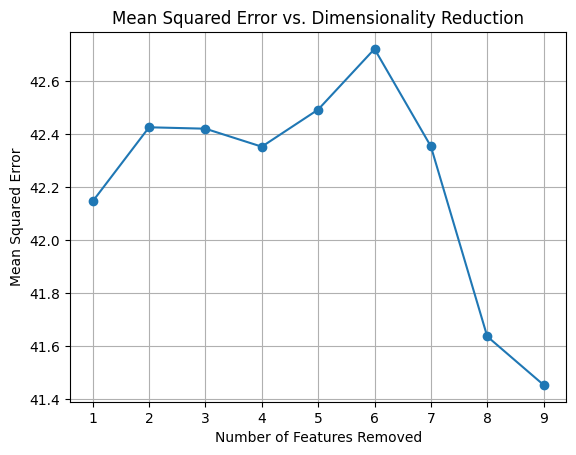

In [31]:
def reduce_dimensions_and_plot(df_train, target_feature, n_dimensions=3):
    X = df_train.drop(target_feature, axis=1)
    labels = df_train[target_feature]

    # Split the data into training and testing set
    features_train, features_test, labels_train, labels_test = train_test_split(
        X, labels, test_size=0.2, random_state=0)

    # Store the mean squared errors here
    mse_errors = []

    for i in range(n_dimensions):
        # Initialize the Linear Regression model
        model = LinearRegression()

        # Fit the model to the training data
        model.fit(features_train, labels_train)

        # Making predictions on the testing set
        predictions = model.predict(features_test)

        # Record the mean squared error
        mse = metrics.mean_squared_error(labels_test, predictions)
        mse_errors.append(mse)

        print(f'Reduction step {i+1}:')
        print('Coefficients:', model.coef_)
        print("Mean squared error: %.2f" % mse)

        # Identify the least important feature (smallest absolute coefficient)
        smallest_coef_index = np.argmin(np.abs(model.coef_))
        feature_to_remove = features_train.columns[smallest_coef_index]
        print("Dropping the least influential feature:", feature_to_remove)

        # Drop the least influential feature
        features_train = features_train.drop(feature_to_remove, axis=1)
        features_test = features_test.drop(feature_to_remove, axis=1)

    # Plot the errors vs dimensionality reduction
    plt.figure()
    plt.plot(range(1, n_dimensions+1), mse_errors, marker='o')
    plt.title('Mean Squared Error vs. Dimensionality Reduction')
    plt.xlabel('Number of Features Removed')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

# Assuming df_train and target_feature are defined earlier in the code
# Call the function with the DataFrame and the name of the target feature
reduce_dimensions_and_plot(df_train, 'target_feature',n_dimensions=9)

In [ ]:
def plotting_prediction(df_train):
  prediction = model.predict(df_train.drop('target_feature',axis=1))
    # Calculate difference between prediction and actual target_feature
  difference = prediction.mean() - df_train['target_feature'].mean()
  print('Average difference between prediction and actual target_feature:', difference)
  # Plot the predicted values against the actual ones
  plt.plot(smooth(prediction,51),label = "predicted")
  plt.plot(smooth(df_train['target_feature'],51),label = "Actual")

  plt.title('Predicted vs Original Values')
  plt.xlabel('Data points')
  plt.ylabel('Watt (w)')
  plt.legend()
  plt.ylim([0,120])
  plt.show()
plotting_prediction(df_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Core Temperatures (avg) [°C] _updated
CPU GT Cores (Graphics) [°C] _updated
Average difference between prediction and actual target_feature: 3.081481794876595


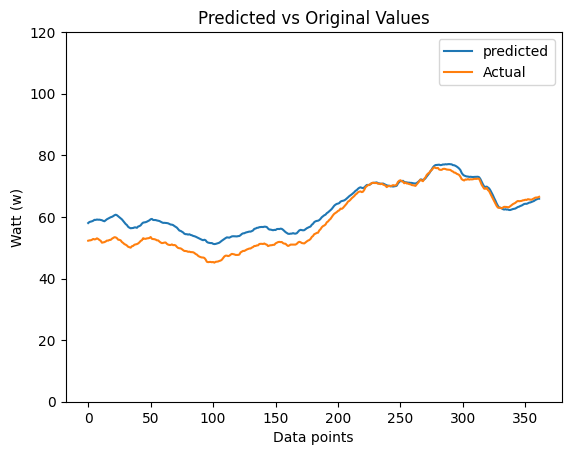

Average difference between prediction and actual target_feature: 3.081481794876595


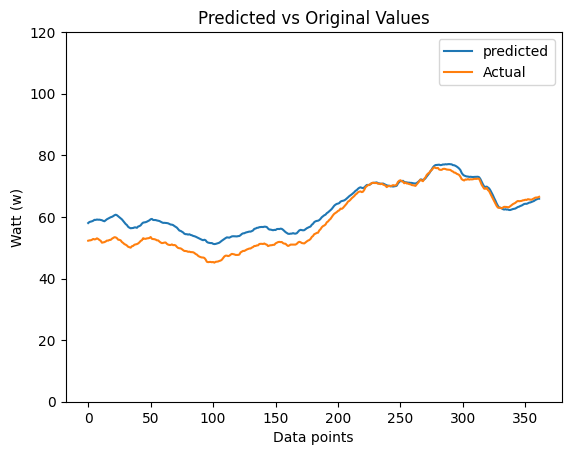

Average difference between prediction and actual target_feature: 1.4611901900483417


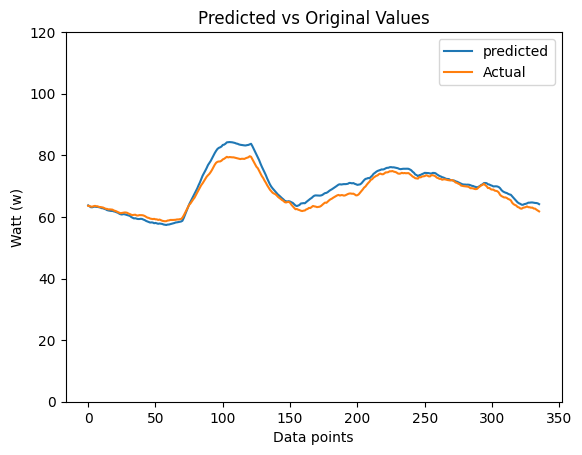

Average difference between prediction and actual target_feature: -2.334600446771617


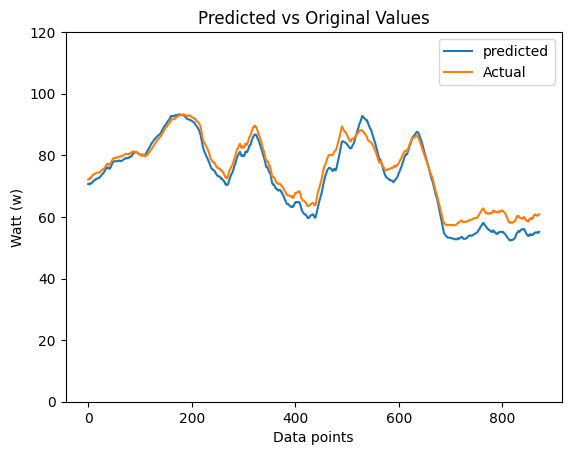

Average difference between prediction and actual target_feature: 1.7472500397322719


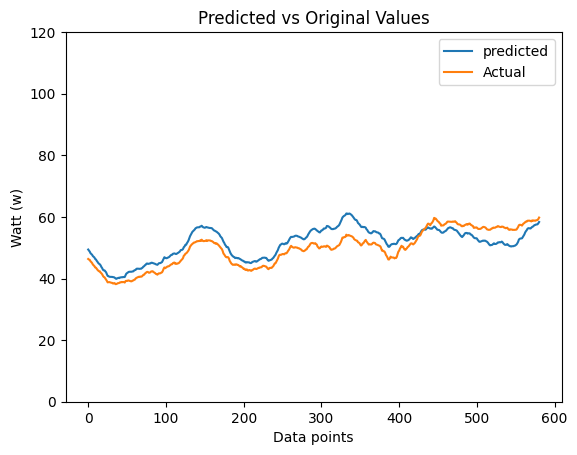

Average difference between prediction and actual target_feature: 2.314375279508539


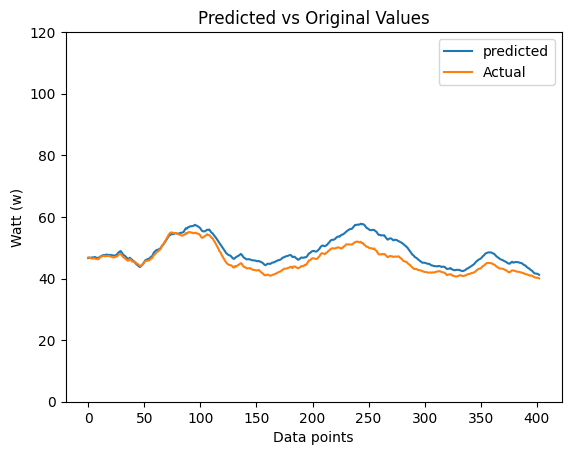

Average difference between prediction and actual target_feature: 2.76918673521795


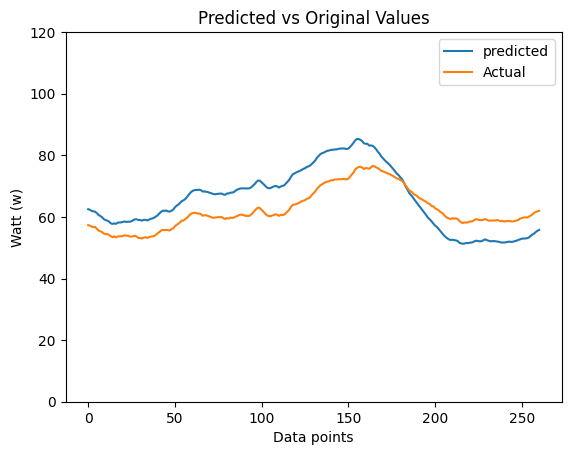

Average difference between prediction and actual target_feature: -6.228352006134763


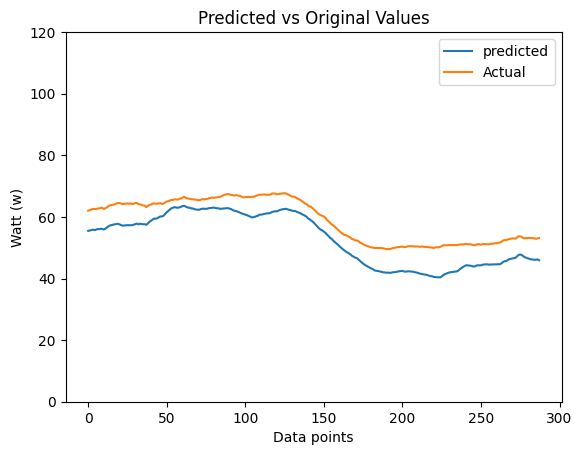

Average difference between prediction and actual target_feature: -3.8586696478898403


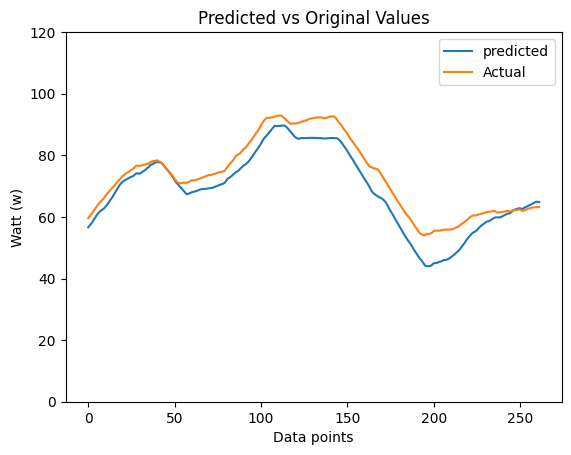

Average difference between prediction and actual target_feature: -4.619433511314057


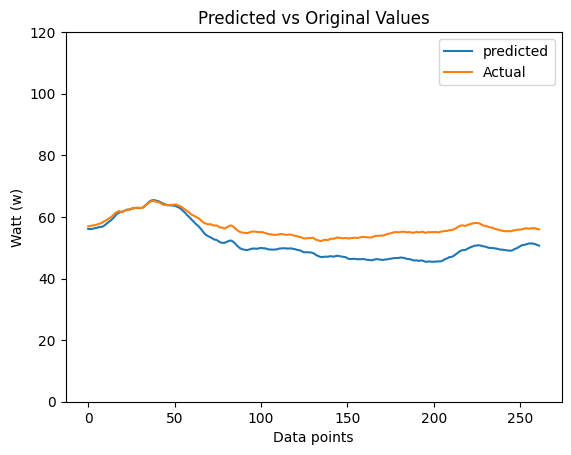

In [ ]:
Validation1 = pre_process_model(ProcessedT1,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)
Validation2 = pre_process_model(ProcessedT2,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)
Validation3 = pre_process_model(ProcessedT3,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)
Validation4 = pre_process_model(ProcessedT4,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)
Validation5 = pre_process_model(ProcessedT5,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)
Validation6 = pre_process_model(ProcessedT6,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)
Validation7 = pre_process_model(ProcessedT7,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)
Validation8 = pre_process_model(ProcessedT8,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)
Validation9 = pre_process_model(ProcessedT9,['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','CPU GT Cores (Graphics) [°C]'],6)

plotting_prediction(Validation1)
plotting_prediction(Validation2)
plotting_prediction(Validation3)
plotting_prediction(Validation4)
plotting_prediction(Validation5)
plotting_prediction(Validation6)
plotting_prediction(Validation7)
plotting_prediction(Validation8)
plotting_prediction(Validation9)

In [ ]:
for column in df_big.columns:
  print(column)

Virtual Memory Committed [MB]
Virtual Memory Available [MB]
Virtual Memory Load [%]
Physical Memory Used [MB]
Physical Memory Available [MB]
Physical Memory Load [%]
Page File Usage [%]
Core VIDs (avg) [V]
Core 0 VID [V]
Core 1 VID [V]
Core 2 VID [V]
Core 3 VID [V]
Core Clocks (avg) [MHz]
Core 0 Clock [MHz]
Core 1 Clock [MHz]
Core 2 Clock [MHz]
Core 3 Clock [MHz]
Bus Clock [MHz]
Ring/LLC Clock [MHz]
System Agent Clock [MHz]
Core Effective Clocks (avg) [MHz]
Core 0 T0 Effective Clock [MHz]
Core 0 T1 Effective Clock [MHz]
Core 1 T0 Effective Clock [MHz]
Core 1 T1 Effective Clock [MHz]
Core 2 T0 Effective Clock [MHz]
Core 2 T1 Effective Clock [MHz]
Core 3 T0 Effective Clock [MHz]
Core 3 T1 Effective Clock [MHz]
Average Effective Clock [MHz]
Core Usage (avg) [%]
Core 0 T0 Usage [%]
Core 0 T1 Usage [%]
Core 1 T0 Usage [%]
Core 1 T1 Usage [%]
Core 2 T0 Usage [%]
Core 2 T1 Usage [%]
Core 3 T0 Usage [%]
Core 3 T1 Usage [%]
Max CPU/Thread Usage [%]
Total CPU Usage [%]
On-Demand Clock Modulation

In [ ]:
df_write = df_big[['watt','GPU Utilization [%]','Core Utility (avg) [%]']]
T1_write = ProcessedT1[['watt','GPU Utilization [%]','Core Utility (avg) [%]']]
T2_write = ProcessedT2[['watt','GPU Utilization [%]','Core Utility (avg) [%]']]
T3_write = ProcessedT3[['watt','GPU Utilization [%]','Core Utility (avg) [%]']]
T4_write = ProcessedT4[['watt','GPU Utilization [%]','Core Utility (avg) [%]']]

In [ ]:
df_write.to_csv('Measured.csv',index = False)
T1_write.to_csv('Testing1.csv',index = False)
T2_write.to_csv('Testing2.csv',index = False)
T3_write.to_csv('Testing3.csv',index = False)
T4_write.to_csv('Testing4.csv',index = False)

In [ ]:
ProcessedT1.to_csv('Test1.csv', index=False)
ProcessedT2.to_csv('Test2.csv', index=False)
ProcessedT3.to_csv('Test3.csv', index=False)
ProcessedT4.to_csv('Test4.csv', index=False)

In [ ]:
print(ProcessedT1[['GPU Utilization [%]','Core Usage (avg) [%]','Core Temperatures (avg) [°C]','Ambient [°C]']])

                     GPU Utilization [%]  Core Usage (avg) [%]  \
Time                                                             
2024-01-01 09:43:54                  1.5             13.575000   
2024-01-01 09:43:55                  0.0             13.133333   
2024-01-01 09:43:56                  0.0             18.733333   
2024-01-01 09:43:57                  0.0             18.000000   
2024-01-01 09:43:58                  0.0             11.900000   
...                                  ...                   ...   
2024-01-01 09:50:43                 30.0             27.433333   
2024-01-01 09:50:44                 30.0             36.133333   
2024-01-01 09:50:45                 30.0             23.100000   
2024-01-01 09:50:46                 30.0             33.333333   
2024-01-01 09:50:47                  5.0             26.700000   

                     Core Temperatures (avg) [°C]  Ambient [°C]  
Time                                                             
2024-01-0